## Observations and Insights 

Observation from the data
Observation 1: The mouse weight and average tumor volume for the Capomulin regimen have almost a perfect positive correlation, meaning that both variables move in the same direction together. This indicates that when the mouse weight increase, the average volume increases almost at the same level. 
Obervation 2: Only drug Infubinol has a outlier. The outlier might make the drug seem more effective than it actually is because the average tumor volume moved toward the outlier. 
Obervation 3: The gender distribution is almost equal in the data set, therefore, the gender does not affect the accuracy of the data. 


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
# Calculate the number of data entries and number of mice used in study
raw_mouse_count = combined_data['Mouse ID'].count()
unique_mouse_count = combined_data['Mouse ID'].nunique()

# Display results
print(f'Data entry count is {raw_mouse_count}. Number of mice is {unique_mouse_count}.')

Data entry count is 1893. Number of mice is 249.


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_combined_data = combined_data[combined_data.duplicated(['Mouse ID', 'Timepoint'])]

# Display the duplicate data
duplicate_combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = combined_data[combined_data['Mouse ID'] == 'g989']

# Display all data 
duplicate_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_data.drop(combined_data[combined_data['Mouse ID'] == 'g989'].index, inplace = True)

# Preview DataFrame
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
new_mouse_count = combined_data['Mouse ID'].count()
new_unique_mouse_count = combined_data['Mouse ID'].nunique()

# Display results
print(f'Data entry count is {new_mouse_count}. Number of mice is {new_unique_mouse_count}.')

Data entry count is 1880. Number of mice is 248.


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.

# Determine the drugs used, calculate statistics for each using for loops, and input results into lists
drugs = combined_data['Drug Regimen'].unique()
drug_means = [(combined_data.loc[combined_data['Drug Regimen'] == drug, 'Tumor Volume (mm3)']).mean() for drug in drugs]
drug_medians = [(combined_data.loc[combined_data['Drug Regimen'] == drug, 'Tumor Volume (mm3)']).median(axis=0) for drug in drugs]
drug_variances = [(combined_data.loc[combined_data['Drug Regimen'] == drug, 'Tumor Volume (mm3)']).var() for drug in drugs]
drug_SEMs = [(combined_data.loc[combined_data['Drug Regimen'] == drug, 'Tumor Volume (mm3)']).sem(axis=0) for drug in drugs]

# Convert lists into series
drugs_series = pd.Series((drugs), name = "Drug Regimen")
means_series = pd.Series((drug_means), name = 'Mean')
medians_series = pd.Series((drug_medians), name = 'Median')
variances_series = pd.Series((drug_variances), name = 'Variance')
SEMs_series = pd.Series((drug_SEMs), name = 'SEM')

# Combine series together, set the drug as index and sort them alphabetically
summary_table = pd.concat([drugs_series, means_series, medians_series, variances_series, SEMs_series], axis=1)
summary_table = summary_table.set_index('Drug Regimen')
summary_table.sort_values(by=['Drug Regimen'], inplace=True, ascending=True)

# Preview table
summary_table

,Mean,Median,Variance,SEM
Drug Regimen,,,,
Capomulin,40.675741,41.557809,24.947764,0.329346
Ceftamin,52.591172,51.776157,39.290177,0.469821
Infubinol,52.884795,51.820584,43.128684,0.492236
Ketapril,55.235638,53.698743,68.553577,0.603860
Naftisol,54.331565,52.509285,66.173479,0.596466
Placebo,54.033581,52.288934,61.168083,0.581331
Propriva,52.320930,50.446266,43.852013,0.544332
Ramicane,40.216745,40.673236,23.486704,0.320955
Stelasyn,54.233149,52.431737,59.450562,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function
summary_table2 = combined_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'sem'])

# Rename columns
summary_table2 = summary_table2.rename(columns={'mean':'Mean', 'median':'Median', 'var':'Variance', 'sem':'SEM'})

# Preview table
summary_table2

,Mean,Median,Variance,SEM
Drug Regimen,,,,
Capomulin,40.675741,41.557809,24.947764,0.329346
Ceftamin,52.591172,51.776157,39.290177,0.469821
Infubinol,52.884795,51.820584,43.128684,0.492236
Ketapril,55.235638,53.698743,68.553577,0.603860
Naftisol,54.331565,52.509285,66.173479,0.596466
Placebo,54.033581,52.288934,61.168083,0.581331
Propriva,52.320930,50.446266,43.852013,0.544332
Ramicane,40.216745,40.673236,23.486704,0.320955
Stelasyn,54.233149,52.431737,59.450562,0.573111


## Bar and Pie Charts

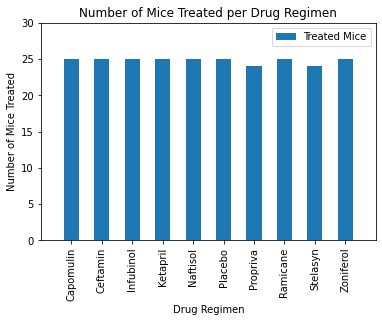

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
# Group data by Drug Regimen and calculate number of mice used for each
treatment_specimens_count = combined_data.groupby(['Drug Regimen'])['Mouse ID'].nunique()

# Convert data to DataFrame format and rename columns
treatment_specimens_df = pd.DataFrame(treatment_specimens_count)
treatment_specimens_df = treatment_specimens_df.rename(columns={'Mouse ID':'Treated Mice'})

# Plot bar chart and set attributes
treatments_barplot = treatment_specimens_df.plot.bar(title='Number of Mice Treated per Drug Regimen')
treatments_barplot.set_ylabel('Number of Mice Treated')
treatments_barplot.set_xlim(-1, len(treatment_specimens_df))
treatments_barplot.set_ylim(0, 30)

# Reset DataFrame indexes to make them callable
treatment_specimens_df = treatment_specimens_df.reset_index()

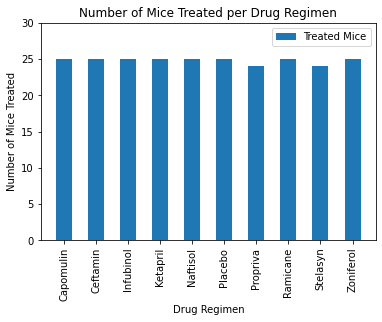

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x_axis = np.arange(len(treatment_specimens_df))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(6,4))
plt.bar(x_axis, treatment_specimens_df["Treated Mice"],width=0.5)
plt.xticks(tick_locations, treatment_specimens_df["Drug Regimen"], rotation="vertical")
plt.title("Number of Mice Treated per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Treated")
plt.ylim(0, 30)
plt.legend(['Treated Mice'])

# Display bar chart
plt.show()

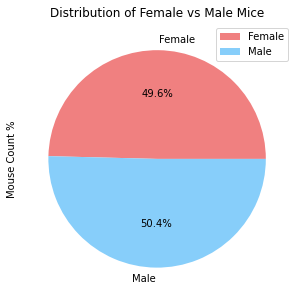

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# Group data by Sex and calculate the count for each
gender_count = combined_data.groupby(['Sex'])['Mouse ID'].nunique()

# Convert data into DataFrame and rename columns
gender_count_df = pd.DataFrame(gender_count)
gender_count_df = gender_count_df.rename(columns={'Mouse ID':'Mouse Count'})

# Plot pie chart and set attributes
gender_pieplot = gender_count_df.plot.pie(y='Mouse Count', 
                                          figsize=(5,5), 
                                          autopct="%1.1f%%", 
                                          title='Distribution of Female vs Male Mice', 
                                          colors=['lightcoral', 'lightskyblue'])
gender_pieplot.set_ylabel('Mouse Count %')

# Reset DataFrame index to make them callable
gender_count_df = gender_count_df.reset_index()

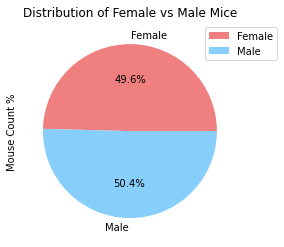

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = gender_count_df['Sex']
sizes = gender_count_df['Mouse Count']
colors=['lightcoral', 'lightskyblue']

plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%")
plt.title("Distribution of Female vs Male Mice")
plt.legend(loc='upper right',labels=gender_count_df['Sex'],bbox_to_anchor=(1.2, 1))
plt.ylabel("Mouse Count %")

# Display pie chart
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_timepoint_df = combined_data.groupby(['Mouse ID'])['Timepoint'].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_tumor_df = pd.merge(final_timepoint_df, combined_data, how='left', left_on=['Mouse ID', 'Timepoint'], right_on=['Mouse ID', 'Timepoint'])

# Preview data
final_tumor_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [25]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    tumor_vol_list.append(final_tumor_df.loc[final_tumor_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)'].tolist())
    
    # add subset 
capomulin_df = final_tumor_df[final_tumor_df['Drug Regimen'] == 'Capomulin']
ramicane_df = final_tumor_df[final_tumor_df['Drug Regimen'] == 'Ramicane']
infubinol_df = final_tumor_df[final_tumor_df['Drug Regimen'] == 'Infubinol']
ceftamin_df = final_tumor_df[final_tumor_df['Drug Regimen'] == 'Ceftamin']
cap_vol_list = capomulin_df['Tumor Volume (mm3)']
ram_vol_list = ramicane_df['Tumor Volume (mm3)']
inf_vol_list = infubinol_df['Tumor Volume (mm3)']
cef_vol_list = ceftamin_df['Tumor Volume (mm3)']


    # Determine outliers of Capomulin regimen using upper and lower bounds
cap_quartiles = cap_vol_list.quantile([.25,.5,.75])
cap_lowerq = cap_quartiles[0.25]
cap_upperq = cap_quartiles[0.75]
cap_iqr = cap_upperq-cap_lowerq

cap_lower_bound = cap_lowerq - (1.5*cap_iqr)
cap_upper_bound = cap_upperq + (1.5*cap_iqr)

print(f"The lower quartile of tumor volume is: {cap_lowerq}")
print(f"The upper quartile of tumor volume is: {cap_upperq}")
print(f"The interquartile range of tumor volume is: {cap_iqr}")
print(f"The median of tumor volume is: {cap_quartiles[0.5]} ")
print(f"Values below {cap_lower_bound} could be outliers.")
print(f"Values above {cap_upper_bound} could be outliers.")

cap_outlier_occupancy = capomulin_df.loc[(capomulin_df['Tumor Volume (mm3)'] < cap_lower_bound) | (capomulin_df['Tumor Volume (mm3)'] > cap_upper_bound)]
cap_outlier_occupancy

The lower quartile of tumor volume is: 32.37735684
The upper quartile of tumor volume is: 40.1592203
The interquartile range of tumor volume is: 7.781863460000004
The median of tumor volume is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites


In [26]:
    # Determine outliers of Ramicane regimen using upper and lower bounds
ram_quartiles = ram_vol_list.quantile([.25,.5,.75])
ram_lowerq = ram_quartiles[0.25]
ram_upperq = ram_quartiles[0.75]
ram_iqr = ram_upperq-ram_lowerq

ram_lower_bound = ram_lowerq - (1.5*ram_iqr)
ram_upper_bound = ram_upperq + (1.5*ram_iqr)

print(f"The lower quartile of tumor volume is: {ram_lowerq}")
print(f"The upper quartile of tumor volume is: {ram_upperq}")
print(f"The interquartile range of tumor volume is: {ram_iqr}")
print(f"The median of tumor volume is: {ram_quartiles[0.5]} ")
print(f"Values below {ram_lower_bound} could be outliers.")
print(f"Values above {ram_upper_bound} could be outliers.")

ram_outlier_occupancy = ramicane_df.loc[(ramicane_df['Tumor Volume (mm3)'] < ram_lower_bound) | (ramicane_df['Tumor Volume (mm3)'] > ram_upper_bound)]
ram_outlier_occupancy

The lower quartile of tumor volume is: 31.56046955
The upper quartile of tumor volume is: 40.65900627
The interquartile range of tumor volume is: 9.098536719999998
The median of tumor volume is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites


In [27]:
    # Determine outliers of Infubinol regimen using upper and lower bounds
inf_quartiles = inf_vol_list.quantile([.25,.5,.75])
inf_lowerq = inf_quartiles[0.25]
inf_upperq = inf_quartiles[0.75]
inf_iqr = inf_upperq-inf_lowerq

inf_lower_bound = inf_lowerq - (1.5*inf_iqr)
inf_upper_bound = inf_upperq + (1.5*inf_iqr)

print(f"The lower quartile of tumor volume is: {inf_lowerq}")
print(f"The upper quartile of tumor volume is: {inf_upperq}")
print(f"The interquartile range of tumor volume is: {inf_iqr}")
print(f"The median of tumor volume is: {inf_quartiles[0.5]} ")
print(f"Values below {inf_lower_bound} could be outliers.")
print(f"Values above {inf_upper_bound} could be outliers.")

inf_outlier_occupancy = infubinol_df.loc[(infubinol_df['Tumor Volume (mm3)'] < inf_lower_bound) | (infubinol_df['Tumor Volume (mm3)'] > inf_upper_bound)]
inf_outlier_occupancy

The lower quartile of tumor volume is: 54.04860769
The upper quartile of tumor volume is: 65.52574285
The interquartile range of tumor volume is: 11.477135160000003
The median of tumor volume is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
31,c326,5,Infubinol,Female,18,25,36.321346,0


In [28]:
    # Determine outliers of Ceftamin regimen using upper and lower bounds
cef_quartiles = cef_vol_list.quantile([.25,.5,.75])
cef_lowerq = cef_quartiles[0.25]
cef_upperq = cef_quartiles[0.75]
cef_iqr = cef_upperq-cef_lowerq

cef_lower_bound = cef_lowerq - (1.5*cef_iqr)
cef_upper_bound = cef_upperq + (1.5*cef_iqr)

print(f"The lower quartile of tumor volume is: {cef_lowerq}")
print(f"The upper quartile of tumor volume is: {cef_upperq}")
print(f"The interquartile range of tumor volume is: {cef_iqr}")
print(f"The median of tumor volume is: {cef_quartiles[0.5]} ")
print(f"Values below {cef_lower_bound} could be outliers.")
print(f"Values above {cef_upper_bound} could be outliers.")

cef_outlier_occupancy = ceftamin_df.loc[(ceftamin_df['Tumor Volume (mm3)'] < cef_lower_bound) | (ceftamin_df['Tumor Volume (mm3)'] > cef_upper_bound)]
cef_outlier_occupancy

The lower quartile of tumor volume is: 48.72207785
The upper quartile of tumor volume is: 64.29983003
The interquartile range of tumor volume is: 15.577752179999997
The median of tumor volume is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites


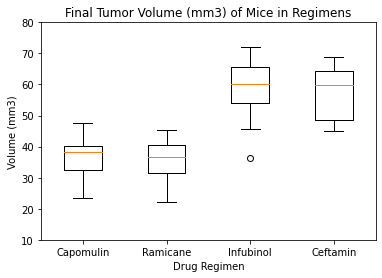

In [29]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume (mm3) of Mice in Regimens')
ax1.set_xlabel('Drug Regimen')
ax1.set_ylabel('Volume (mm3)')
ax1.boxplot(tumor_vol_list)
ax1.set_ylim(10,80)
ax1.set_xticklabels(treatments)

# Display plot
plt.show()

## Line and Scatter Plots

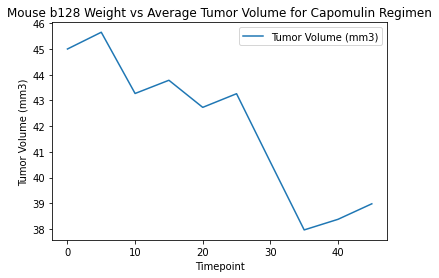

In [30]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# Choose a mouse from Capomulin and put all time and tumor volume data into lists
chosen_mouse = 'b128'
mouse_time_data = combined_data.loc[combined_data['Mouse ID'] == chosen_mouse, 'Timepoint']
mouse_tumor_data = combined_data.loc[combined_data['Mouse ID'] == chosen_mouse, 'Tumor Volume (mm3)']

# Plot line chart and set attributes
plt.plot(mouse_time_data, mouse_tumor_data, label='Tumor Volume (mm3)')
plt.legend(loc='best')
plt.title('Mouse ' + chosen_mouse + ' Weight vs Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')

#Display plot
plt.show()

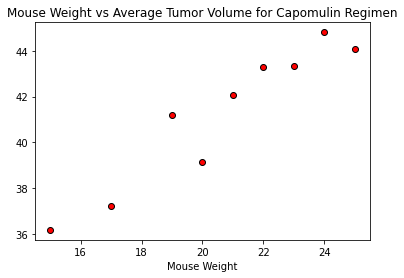

In [31]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
# Gather all Capomulin data
capomulin_data = combined_data[combined_data['Drug Regimen'] == 'Capomulin']

# Group by weight, calculate average tumor volume of each weight and put data into lists
cap_weights_df = capomulin_data.groupby(['Weight (g)']).mean().reset_index()
capomulin_weights = cap_weights_df['Weight (g)']
capomulin_tumor_vol = cap_weights_df['Tumor Volume (mm3)']

# Plot scatter chart and set attributes
plt.scatter(capomulin_weights, capomulin_tumor_vol, marker='o', facecolors="red", edgecolors="black")
plt.title('Mouse Weight vs Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Mouse Weight')

# Display plot
plt.show()

## Correlation and Regression

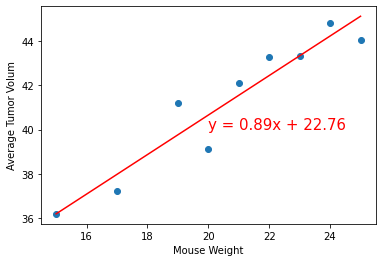

In [32]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Calculate correlation coefficient and set attributes
x_values = cap_weights_df['Weight (g)']
y_values = cap_weights_df['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

# Display results of correlation coefficient

# Calculate linear regression model and set attributes
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,40),fontsize=15,color="red")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volum")

# Display plot
plt.show()